In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
data = pd.read_csv('all_data.csv')

In [6]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [43]:
data.columns = ['Country', 'Year', 'Life_expectancy', 'GDP']

In [44]:
data.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [55]:
print(f'There are are {data.Country.nunique()} countries and these are as follows: {data.Country.unique()}')

There are are 6 countries and these are as follows: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [56]:
print(f'The analysis starts from {np.min(data.Year)} and ends at {np.max(data.Year)}, which means the dataset including {data.Year.nunique()} consecutive years.')

The analysis starts from 2000 and ends at 2015, which means the dataset including 16 consecutive years.


In [32]:
print(data.GDP.head())

0    7.786093e+10
1    7.097992e+10
2    6.973681e+10
3    7.564346e+10
4    9.921039e+10
Name: GDP, dtype: float64


0        Chile
1        Chile
2        Chile
3        Chile
4        Chile
        ...   
91    Zimbabwe
92    Zimbabwe
93    Zimbabwe
94    Zimbabwe
95    Zimbabwe
Name: Country, Length: 96, dtype: object

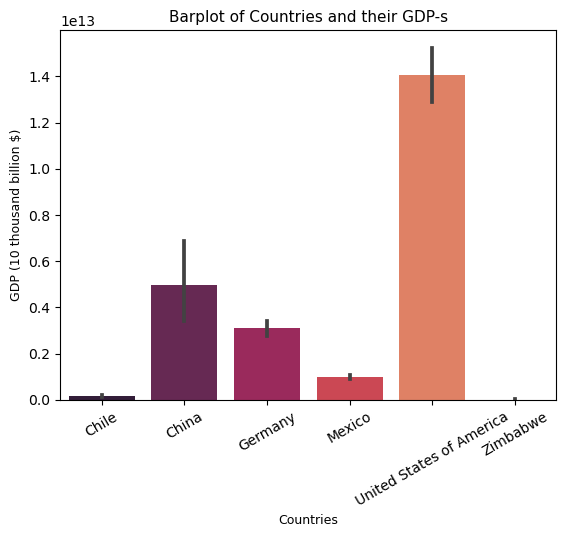

<Figure size 640x480 with 0 Axes>

In [53]:
sns.barplot(x='Country', y='GDP', data=data, palette='rocket')
plt.title('Barplot of Countries and their GDP-s', fontsize=11)
plt.xticks(rotation=30)
plt.xlabel('Countries', fontsize=9)
plt.ylabel('GDP (10 thousand billion $)', fontsize=9)
plt.show()
plt.clf()

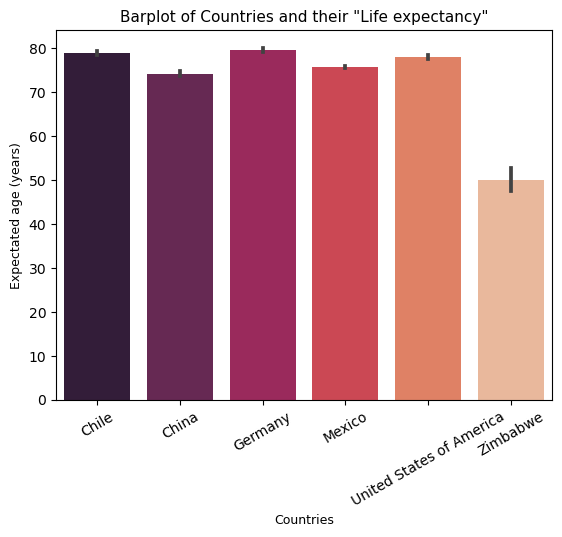

<Figure size 640x480 with 0 Axes>

In [54]:
sns.barplot(x='Country', y='Life_expectancy', data=data, palette='rocket')
plt.title('Barplot of Countries and their "Life expectancy"', fontsize=11)
plt.xticks(rotation=30)
plt.xlabel('Countries', fontsize=9)
plt.ylabel('Expectated age (years)', fontsize=9)
plt.show()
plt.clf()